Keywords (참조용)

Section 1때 배운 내용들은 다음과 같습니다.

- Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization

- Sprint 2 : Hypothesis Test, CI, Bayesian

- Sprint 3 : DR, PCA, Cluster
반드시 들어가야 하는 내용.

앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.



- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코드스테이츠/N1XX/section review/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
df.info()
# null 및 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [3]:
df.isnull().sum() / len(df)
# 결측치 10% 미만 : 삭제 or 대치

Unnamed: 0     0.000000
Name           0.000000
Platform       0.000000
Year           0.016327
Genre          0.003012
Publisher      0.003494
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64

In [4]:
df['Name'].value_counts()
# unique값이 너무 많아서 쓸모 X

Need for Speed: Most Wanted            12
FIFA 14                                 9
Ratatouille                             9
Madden NFL 07                           9
LEGO Marvel Super Heroes                9
                                       ..
Saki: Achiga-Hen Portable               1
Shining Force Feather                   1
Model * Oshare Audition: Dream Girl     1
Twisted Metal 2                         1
Rainbow Islands: Revolution             1
Name: Name, Length: 11493, dtype: int64

In [5]:
df.dropna(inplace = True)
df.drop(['Unnamed: 0','Name'], axis = 1, inplace = True)

In [6]:
df.isnull().sum()

Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [7]:
# K, M이 데이터(str)에 섞여있다
# K = 1,000 / M = 1,000,000
def to_float(string):
  if 'K' in string:
      string = float(string.replace('K', '')) / 1000
  elif 'M' in string:
      string = float(string.replace('M', '')) 
  return string

In [8]:
df['NA_Sales'] = df['NA_Sales'].apply(to_float)
df['EU_Sales'] = df['EU_Sales'].apply(to_float)
df['JP_Sales'] = df['JP_Sales'].apply(to_float)
df['Other_Sales'] = df['Other_Sales'].apply(to_float)
# apply 한꺼번에 하는 방법은 없는걸까

In [9]:
# df = df.apply(lambda x: to_float(x) if x.name in ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'] else x)
# apply는 Series 객체를 인자로 받는데, Series에는 name이라는 필드가 있다 -> 특정 열에만 가능
# 디폴트는 axis = 0 (열기준)

In [10]:
import pandas as pd
df = df.apply(lambda x: pd.to_numeric(x) if x.name in ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'] else x)

질문 1

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

In [11]:
# df2 = df['NA_Sales':'Other_Sales'] + df['Genre']
df2 = df.iloc[:, [2, 4, 5, 6, 7]]
df2

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


In [12]:
df3 = df2.groupby('Genre').sum() # 지역에 따라 장르 선호도가 다른가? - sum 하면 금방인데..
df3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


In [13]:
df4 = df3.reset_index()
df4 = df4.melt(id_vars = 'Genre', value_vars = ['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales'])
# tidy data - for visual

In [14]:
df41 = df4[df4['variable'] == 'NA_Sales'].sort_values(by = 'value', ascending = False)
df42 = df4[df4['variable'] == 'EU_Sales'].sort_values(by = 'value', ascending = False)
df43 = df4[df4['variable'] == 'JP_Sales'].sort_values(by = 'value', ascending = False)
df44 = df4[df4['variable'] == 'Other_Sales'].sort_values(by = 'value', ascending = False)

In [15]:
df5 = pd.DataFrame()
df5['NA_Sales_rank'] = df41['Genre'][:5].values
df5['EU_Sales_rank'] = df42['Genre'][:5].values
df5['JP_Sales_rank'] = df43['Genre'][:5].values
df5['Other_Sales_rank'] = df44['Genre'][:5].values
df5

,NA_Sales_rank,EU_Sales_rank,JP_Sales_rank,Other_Sales_rank
0,Action,Action,Role-Playing,Action
1,Sports,Sports,Action,Sports
2,Shooter,Shooter,Sports,Shooter
3,Platform,Racing,Platform,Racing
4,Misc,Misc,Misc,Misc


**대부분의 지역에서 상위 랭크된 게임 장르는 같다.**
1. Action
2. Sports
3. Shooter

(단, JP에서 Role-Playing 이상치 제외시)


질문 2 

연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

In [16]:
df['Year'] = df['Year'].astype(int)
df['Year'].dtypes

dtype('int64')

In [17]:
df[df['Year'] < 100].count() / len(df) * 100
# 0.6% 정도이므로 결측치 제거
# 1900~, 2000~ 으로 변환 시도했으나 실패

Platform       0.615726
Year           0.615726
Genre          0.615726
Publisher      0.615726
NA_Sales       0.615726
EU_Sales       0.615726
JP_Sales       0.615726
Other_Sales    0.615726
dtype: float64

In [18]:
df = df[df['Year'] > 100]


In [19]:
# 10년 단위로 함수 지정
# max = 2020, min = 1980
def category_year(x):
  if 1980 <= x < 1990:
    return 1980
  elif 1990 <= x < 2000:
    return 1990
  elif 2000 <= x < 2010:
    return 2000
  elif 2010 <= x <= 2020:
    return 2010  

In [20]:
# continuous -> categorical
df['Year'] = df['Year'].apply(category_year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df['Year'].value_counts()

2000    9100
2010    5087
1990    1751
1980     203
Name: Year, dtype: int64

In [22]:
df['Total_Sales'] = df.iloc[:, -4:].sum(axis = 1)
# 열마다 하나씩 더한거니까 axis = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,DS,2000,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,Wii,2000,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...
16593,GC,2000,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,PSP,2000,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,PS3,2010,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,PSV,2010,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [24]:
print(df['Publisher'].describe())
print(df['Platform'].describe())
# describe - freq : 최빈값의 빈도 / 해결함

count               16141
unique                573
top       Electronic Arts
freq                 1328
Name: Publisher, dtype: object
count     16141
unique       31
top          DS
freq       2111
Name: Platform, dtype: object


In [25]:
crs = pd.crosstab(df['Year'], df['Platform'], margins = False)
crs2 = pd.crosstab(df['Year'], df['Publisher'], margins = False)
crs3 = pd.crosstab(df['Year'], df['Genre'], margins = False)


In [26]:
from scipy.stats import chisquare, chi2_contingency
chi2_contingency(crs, correction = False)[1]
chi2_contingency(crs2, correction = False)[1]
# 둘 다 pvalue = 0 -> 연관성 있따
chi2_contingency(crs3, correction = False)[1]


4.867015370971659e-194

In [27]:
grouped = df.groupby(df['Year']) # groupby할 때 df로
# grouped.size() : 데이터별 개수
n1, n2, n3, n4 = grouped.size() // 100 * 5 # 그룹별 5%씩 추출
print(n1, n2, n3, n4)

10 85 455 250


In [28]:
# 정렬 후 그룹바이... 그게 맞구나 
# df.sort_values(by = 'Total_Sales', ascending = False).groupby('Year').head()
df61 = df.groupby('Year').get_group(1980).sort_values(by = 'Total_Sales', ascending = False).iloc[:n1, :]
df62 = df.groupby('Year').get_group(1990).sort_values(by = 'Total_Sales', ascending = False).iloc[:n2, :]
df63 = df.groupby('Year').get_group(2000).sort_values(by = 'Total_Sales', ascending = False).iloc[:n3, :]
df64 = df.groupby('Year').get_group(2010).sort_values(by = 'Total_Sales', ascending = False).iloc[:n4, :]
# 판매량 기준 상위 5%씩 추출 

In [29]:
df65 = pd.concat([df61, df62, df63, df64], ignore_index = True)

In [30]:
print(df61['Platform'].value_counts(normalize = True)[:5],'\n\n',
      df62['Platform'].value_counts(normalize = True)[:5],'\n\n',
      df63['Platform'].value_counts(normalize = True)[:5],'\n\n',
      df64['Platform'].value_counts(normalize = True)[:5])
# 플랫폼
# PS가 90년대에 출범 후 계속 시리즈 내놓으며 상위권 석권
# X360이 10년대에 PS를 처음으로 제치고 1위

NES     0.6
GB      0.3
2600    0.1
Name: Platform, dtype: float64 

 PS      0.423529
SNES    0.164706
GB      0.152941
N64     0.152941
PC      0.058824
Name: Platform, dtype: float64 

 PS2     0.318681
DS      0.127473
X360    0.123077
Wii     0.101099
PS3     0.101099
Name: Platform, dtype: float64 

 X360    0.252
PS3     0.252
PS4     0.144
Wii     0.092
3DS     0.088
Name: Platform, dtype: float64


In [31]:
print(df61['Publisher'].value_counts(normalize = True)[:5],'\n\n',
      df62['Publisher'].value_counts(normalize = True)[:5],'\n\n',
      df63['Publisher'].value_counts(normalize = True)[:5],'\n\n',
      df64['Publisher'].value_counts(normalize = True)[:5])
# 게임회사
# Nintendo : 줄곧 1위, 10년대에 'Electronic Arts'에 뺏겨 2위
# Sony : 90년에 2위 안착 but, 점점 사라짐
# Electronic Arts : 00년대에 'Sony' 제치고 2위, 후에 1위 


Nintendo    0.9
Atari       0.1
Name: Publisher, dtype: float64 

 Nintendo                       0.435294
Sony Computer Entertainment    0.176471
Virgin Interactive             0.058824
Eidos Interactive              0.058824
Enix Corporation               0.023529
Name: Publisher, dtype: float64 

 Nintendo                       0.202198
Electronic Arts                0.162637
Sony Computer Entertainment    0.090110
Activision                     0.087912
THQ                            0.052747
Name: Publisher, dtype: float64 

 Electronic Arts         0.220
Nintendo                0.144
Ubisoft                 0.116
Activision              0.100
Take-Two Interactive    0.084
Name: Publisher, dtype: float64


In [32]:
print(df61['Genre'].value_counts(normalize = True)[:5],'\n\n',
      df62['Genre'].value_counts(normalize = True)[:5],'\n\n',
      df63['Genre'].value_counts(normalize = True)[:5],'\n\n',
      df64['Genre'].value_counts(normalize = True)[:5])
# 장르
# Action이 90년대에 출범 후 2위, 후에 계속 1위 석권
# Shooter이 지지부진하다가 00년대부터 급성장으로 2위까지 오름
# Role-Playing은 꾸준히, Sport 급성장 등 춘추전국시대


Platform    0.4
Puzzle      0.4
Shooter     0.1
Action      0.1
Name: Genre, dtype: float64 

 Platform        0.270588
Action          0.164706
Racing          0.129412
Role-Playing    0.094118
Fighting        0.094118
Name: Genre, dtype: float64 

 Action          0.197802
Sports          0.136264
Misc            0.109890
Role-Playing    0.105495
Shooter         0.105495
Name: Genre, dtype: float64 

 Action          0.252
Shooter         0.208
Sports          0.180
Role-Playing    0.108
Misc            0.084
Name: Genre, dtype: float64


3번 문제  
출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [33]:
df.sort_values(by = 'Total_Sales', ascending = False, inplace = True, ignore_index = True)
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii,2000,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1980,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2000,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii,2000,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1990,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...
16136,GBA,2000,Puzzle,Telegames,0.01,0.00,0.00,0.00,0.01
16137,GBA,2000,Simulation,Tecmo Koei,0.01,0.00,0.00,0.00,0.01
16138,PSP,2000,Adventure,Midway Games,0.00,0.01,0.00,0.00,0.01
16139,PC,2000,Role-Playing,NCSoft,0.00,0.01,0.00,0.00,0.01


In [34]:
# 판매량이 1보다 큰 것 : 2009개
(df['Total_Sales'] > 1).sum()

2009

In [35]:
df = df[df['Total_Sales'] > 1]
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii,2000,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1980,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2000,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii,2000,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1990,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...
2004,PS,1990,Puzzle,Hasbro Interactive,0.56,0.38,0.00,0.07,1.01
2005,PS,1990,Racing,Electronic Arts,0.56,0.38,0.00,0.07,1.01
2006,SNES,1990,Sports,Acclaim Entertainment,0.87,0.12,0.00,0.02,1.01
2007,PS3,2010,Action,Disney Interactive Studios,0.44,0.40,0.00,0.17,1.01


In [36]:
df.groupby('Platform').describe()

Year                                                         \
          count         mean       std     min     25%     50%     75%   
Platform                                                                 
2600       23.0  1980.000000  0.000000  1980.0  1980.0  1980.0  1980.0   
3DS        45.0  2010.000000  0.000000  2010.0  2010.0  2010.0  2010.0   
DC          6.0  1995.000000  5.477226  1990.0  1990.0  1995.0  2000.0   
DS        141.0  2001.489362  3.572948  2000.0  2000.0  2000.0  2000.0   
GB         53.0  1990.000000  6.504436  1980.0  1990.0  1990.0  1990.0   
GBA        68.0  2000.000000  0.000000  2000.0  2000.0  2000.0  2000.0   
GC         46.0  2000.000000  0.000000  2000.0  2000.0  2000.0  2000.0   
GEN        11.0  1990.000000  0.000000  1990.0  1990.0  1990.0  1990.0   
N64        49.0  1992.244898  4.215698  1990.0  1990.0  1990.0  1990.0   
NES        71.0  1981.549296  3.644129  1980.0  1980.0  1980.0  1980.0   
PC         68.0  2000.882353  8.054904  1990.0  1990.0  2000.0  2010.0   
PS        201.0  1991.542289  3.620698  1990.0  1990.0  1990.0  1990.0   
PS2       309.0  2000.000000  0.000000  2000.0  2000.0  2000.0  2000.0   
PS3       239.0  2006.025105  4.904058  2000.0  2000.0  2010.0  2010.0   
PS4        69.0  2010.000000  0.000000  2010.0  2010.0  2010.0  2010.0   
PSP        54.0  2000.740741  2.643505  2000.0  2000.0  2000.0  2000.0   
PSV         7.0  2010.000000  0.000000  2010.0  2010.0  2010.0  2010.0   
SAT         3.0  1990.000000  0.000000  1990.0  1990.0  1990.0  1990.0   
SCD         1.0  1990.000000       NaN  1990.0  1990.0  1990.0  1990.0   
SNES       48.0  1990.000000  0.000000  1990.0  1990.0  1990.0  1990.0   
Wii       154.0  2002.857143  4.532279  2000.0  2000.0  2000.0  2010.0   
WiiU       19.0  2010.000000  0.000000  2010.0  2010.0  2010.0  2010.0   
X360      230.0  2005.608696  4.973635  2000.0  2000.0  2010.0  2010.0   
XB         51.0  2000.000000  0.000000  2000.0  2000.0  2000.0  2000.0   
XOne       43.0  2010.000000  0.000000  2010.0  2010.0  2010.0  2010.0   

                 NA_Sales            ... Other_Sales        Total_Sales  \
             max    count      mean  ...         75%    max       count   
Platform                             ...                                  
2600      1980.0     23.0  1.880870  ...      0.0200   0.08        23.0   
3DS       2010.0     45.0  1.021333  ...      0.1700   0.89        45.0   
DC        2000.0      6.0  0.905000  ...      0.0700   0.08         6.0   
DS        2010.0    141.0  1.277305  ...      0.2700   2.90       141.0   
GB        2000.0     53.0  2.132264  ...      0.1500   1.00        53.0   
GBA       2000.0     68.0  1.258676  ...      0.0900   0.50        68.0   
GC        2000.0     46.0  1.232391  ...      0.0700   0.22        46.0   
GEN       1990.0     11.0  1.751818  ...      0.1050   0.19        11.0   
N64       2000.0     49.0  1.732857  ...      0.0600   0.23        49.0   
NES       1990.0     71.0  1.687606  ...      0.0450   1.51        71.0   
PC        2010.0     68.0  1.037647  ...      0.2125   1.18        68.0   
PS        2000.0    201.0  1.119005  ...      0.1300   0.96       201.0   
PS2       2000.0    309.0  1.182460  ...      0.3900  10.57       309.0   
PS3       2010.0    239.0  1.064310  ...      0.4300   4.14       239.0   
PS4       2010.0     69.0  1.054928  ...      0.5900   2.31        69.0   
PSP       2010.0     54.0  0.673889  ...      0.3900   1.75        54.0   
PSV       2010.0      7.0  0.498571  ...      0.3100   0.33         7.0   
SAT       1990.0      3.0  0.240000  ...      0.0250   0.03         3.0   
SCD       1990.0      1.0  1.000000  ...      0.0500   0.05         1.0   
SNES      1990.0     48.0  1.257917  ...      0.0725   0.55        48.0   
Wii       2010.0    154.0  2.030779  ...      0.2575   8.46       154.0   
WiiU      2010.0     19.0  1.206842  ...      0.3050   0.57        19.0   
X360      2010.0    230.0  1.777696  ...      0.2700   1.67    

In [37]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'sum')

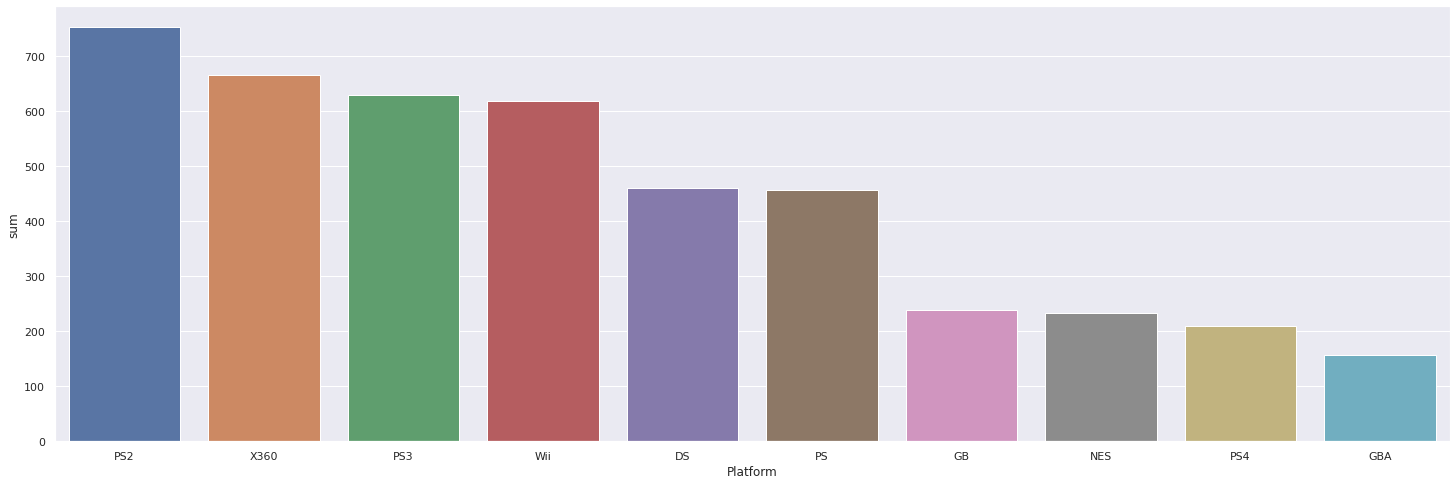

In [38]:
df_Platform = df.groupby('Platform').describe()['Total_Sales'][['count', 'mean']]
df_Platform['sum'] = df_Platform['count'] * df_Platform['mean']
df_Platform.sort_values(by = 'sum', ascending = False, inplace = True )
df_Platform = df_Platform.iloc[:10, -1]
df_Platform

sns.set(rc = {'figure.figsize' : (25, 8)}) # rc 매개변수 : 최종 그림의 크기 제어
ax = sns.barplot(df_Platform.index, df_Platform.values)
ax.set_ylabel('sum')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'sum')

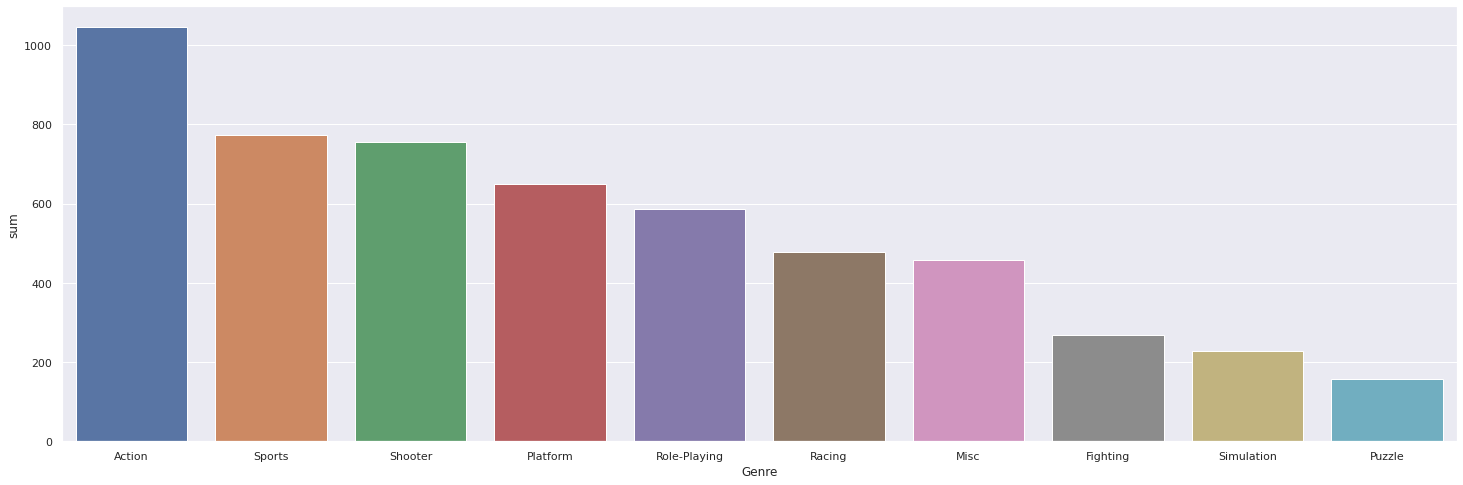

In [39]:
df_Genre = df.groupby('Genre').describe()['Total_Sales'][['count', 'mean']]
df_Genre['sum'] = df_Genre['count'] * df_Genre['mean']
df_Genre.sort_values(by = 'sum', ascending = False, inplace = True )
df_Genre = df_Genre.iloc[:10, -1]
df_Genre

ax = sns.barplot(df_Genre.index, df_Genre.values)
ax.set_ylabel('sum')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'sum')

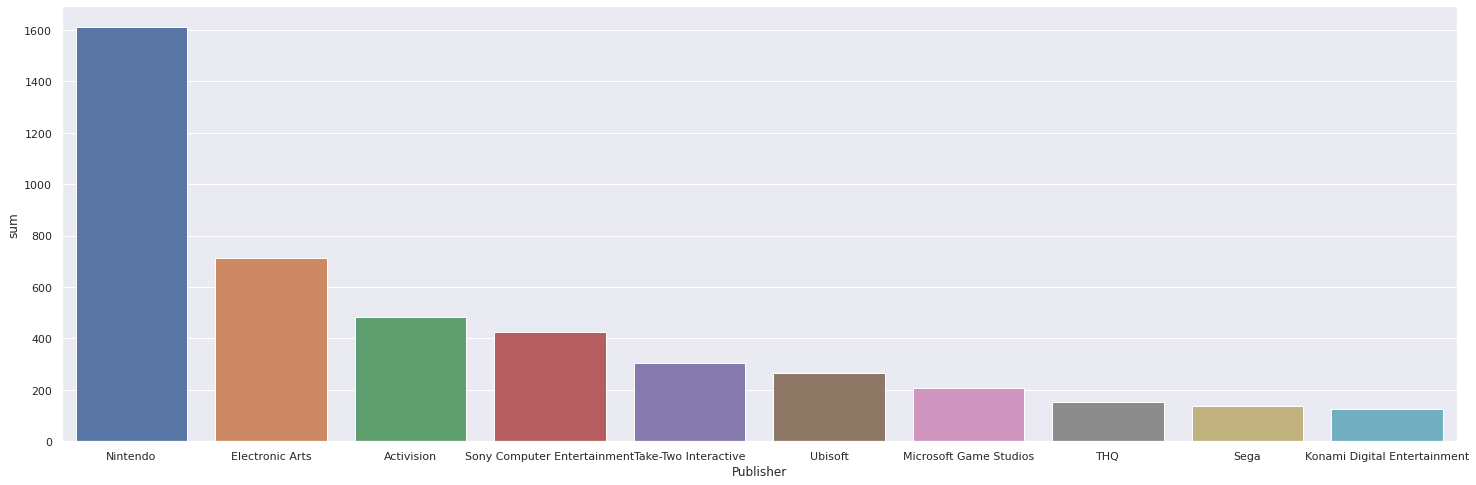

In [40]:
df_Publisher = df.groupby('Publisher').describe()['Total_Sales'][['count', 'mean']]
df_Publisher['sum'] = df_Publisher['count'] * df_Publisher['mean']
df_Publisher.sort_values(by = 'sum', ascending = False, inplace = True )
df_Publisher = df_Publisher.iloc[:10, -1]
df_Publisher

ax = sns.barplot(df_Publisher.index, df_Publisher.values)
ax.set_ylabel('sum')